In [1]:
# 導入套件
import pandas as pd
import tensorflow as tf
import numpy as np
import pandas as pd
import keras
import matplotlib as plt
import math

from sklearn.metrics import mean_squared_error
from sklearn.preprocessing import MinMaxScaler
from sklearn.model_selection import train_test_split
from matplotlib import pyplot as plt

from keras import layers
from keras import models

from keras.models import Sequential
from keras.layers import Dense
from keras.layers import Dropout
from keras.layers import LSTM

In [2]:
# 從 D槽導入資料
training_dataset = pd.read_csv('D:\\Crawler\\DownloadData\\2330.TW.csv')
training_dataset.dropna(axis=0, how='any', inplace=True)
training_dataset # 顯示資料

,Date,Open,High,Low,Close,Adj Close,Volume
0,2016-03-24,158.0,159.0,157.0,158.5,131.511017,24853000.0
1,2016-03-25,158.5,159.0,157.0,158.0,131.096146,10175000.0
2,2016-03-28,158.0,159.0,157.0,159.0,131.925873,15268000.0
3,2016-03-29,158.5,159.5,158.0,159.0,131.925873,18977000.0
4,2016-03-30,158.5,162.0,158.5,161.5,134.000198,43616000.0
...,...,...,...,...,...,...,...
1216,2021-03-17,612.0,612.0,602.0,604.0,604.000000,39517807.0
1217,2021-03-18,606.0,609.0,602.0,602.0,602.000000,29415526.0
1218,2021-03-19,594.0,598.0,591.0,591.0,591.000000,70866028.0
1219,2021-03-22,588.0,598.0,586.0,593.0,593.000000,34089033.0


In [3]:
print(training_dataset.isnull().sum()) #檢查空值，避免圖形改變

Date         0
Open         0
High         0
Low          0
Close        0
Adj Close    0
Volume       0
dtype: int64


In [4]:
# 刪除除了 Open、High、Low 的資料
training_dataset.drop(['Date','Close','Adj Close','Volume'], axis = 1, inplace = True) 

<AxesSubplot:title={'center':'SPY Stock'}>

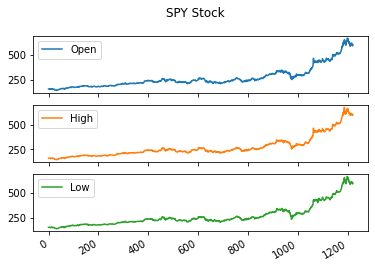

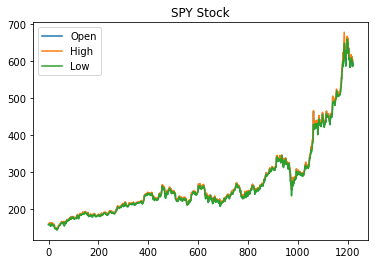

In [5]:
# 可視化數據
training_dataset.plot.line(subplots = True, title='SPY Stock')
training_dataset.plot(title = 'SPY Stock')

In [6]:
training_dataset.drop(['High','Low'], axis=1, inplace = True) # 刪除 High、Low的資料
training_dataset.drop(training_dataset.tail(2).index,inplace=True) # 刪除最下面的兩行資料，獲得更乾淨的數字
print(training_dataset)
print(training_dataset.shape)

       Open
0     158.0
1     158.5
2     158.0
3     158.5
4     158.5
...     ...
1214  614.0
1215  610.0
1216  612.0
1217  606.0
1218  594.0

[1215 rows x 1 columns]
(1215, 1)


In [7]:
train_data = training_dataset.to_numpy() # 使數據轉成numpy數據
train_data

array([[158. ],
       [158.5],
       [158. ],
       ...,
       [612. ],
       [606. ],
       [594. ]])

In [8]:
dataset_train = np.array(train_data[:int(train_data.shape[0]*0.8)]) 
dataset_test = np.array(train_data[int(train_data.shape[0]*0.8):])
print(dataset_train.shape)
print(dataset_test.shape)

(972, 1)
(243, 1)


In [9]:
# 將數據縮小到 0 ~ 1之間
scalar = MinMaxScaler(feature_range = (0,1))
train_data = scalar.fit_transform(dataset_train) 
train_data.shape

(972, 1)

In [10]:
# 將數據分成 x_train和 y_train
x_train = train_data[0:971]
y_train = train_data[1:972]

# x_train重新整理成 LSTM模型可接受的3D輸入
x_train = np.reshape(x_train, (971,1,1)) 
x_train.shape

(971, 1, 1)

In [11]:
# 建立實體化順序模型
model = Sequential()
# 使用units設置節點數量

model.add(LSTM(units=256, return_sequences=True, input_shape=(None, 1)))

# 減少過度凝合
model.add(Dropout(0.2))
model.add(LSTM(units=256, return_sequences=True))
model.add(Dropout(0.2))
model.add(LSTM(units=256, return_sequences=True))
model.add(Dropout(0.2))
model.add(LSTM(units=256))
model.add(Dropout(0.2))

model.add(Dense(units=1))

model.summary()

Model: "sequential"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
lstm (LSTM)                  (None, None, 256)         264192    
_________________________________________________________________
dropout (Dropout)            (None, None, 256)         0         
_________________________________________________________________
lstm_1 (LSTM)                (None, None, 256)         525312    
_________________________________________________________________
dropout_1 (Dropout)          (None, None, 256)         0         
_________________________________________________________________
lstm_2 (LSTM)                (None, None, 256)         525312    
_________________________________________________________________
dropout_2 (Dropout)          (None, None, 256)         0         
_________________________________________________________________
lstm_3 (LSTM)                (None, 256)               5

In [12]:
# 編譯模型，使用 adam優化器
model.compile(optimizer = 'adam', loss = "mean_squared_error")

In [13]:
# 進行100次訓練
model.fit(x_train, y_train, epochs = 100, batch_size = 100)

Epoch 1/100
10/10 [==============================] - 7s 23ms/step - loss: 0.1990
Epoch 2/100
10/10 [==============================] - 0s 23ms/step - loss: 0.0811
Epoch 3/100
10/10 [==============================] - 0s 17ms/step - loss: 0.0431
Epoch 4/100
10/10 [==============================] - 0s 22ms/step - loss: 0.0306
Epoch 5/100
10/10 [==============================] - 0s 24ms/step - loss: 0.0201
Epoch 6/100
10/10 [==============================] - 0s 19ms/step - loss: 0.0108
Epoch 7/100
10/10 [==============================] - 0s 14ms/step - loss: 0.0036
Epoch 8/100
10/10 [==============================] - 0s 17ms/step - loss: 0.0015
Epoch 9/100
10/10 [==============================] - 0s 20ms/step - loss: 0.0014
Epoch 10/100
10/10 [==============================] - 0s 19ms/step - loss: 0.0015
Epoch 11/100
10/10 [==============================] - 0s 17ms/step - loss: 0.0015
Epoch 12/100
10/10 [==============================] - 0s 14ms/step - loss: 0.0014
Epoch 13/100
10/10 [=====

In [14]:
# 顯示訓練數據
print(dataset_test)
print(dataset_test.shape)

[[257. ]
 [268. ]
 [276.5]
 [279.5]
 [284. ]
 [263.5]
 [273. ]
 [276.5]
 [273. ]
 [283.5]
 [285. ]
 [287.5]
 [280. ]
 [278.5]
 [281. ]
 [287. ]
 [283. ]
 [303.5]
 [308. ]
 [300.5]
 [294.5]
 [300. ]
 [295.5]
 [298. ]
 [298.5]
 [299. ]
 [302. ]
 [294.5]
 [296.5]
 [294.5]
 [294.5]
 [300. ]
 [300. ]
 [297.5]
 [293. ]
 [293. ]
 [297.5]
 [291. ]
 [294. ]
 [293. ]
 [296. ]
 [294.5]
 [290.5]
 [295. ]
 [297. ]
 [298.5]
 [292. ]
 [294. ]
 [296. ]
 [300. ]
 [305. ]
 [308.5]
 [316. ]
 [316.5]
 [319. ]
 [325.5]
 [313. ]
 [316. ]
 [317. ]
 [316.5]
 [314.5]
 [314. ]
 [314.5]
 [316. ]
 [319. ]
 [314. ]
 [313.5]
 [315. ]
 [319. ]
 [327. ]
 [332.5]
 [343.5]
 [337.5]
 [346. ]
 [352.5]
 [351. ]
 [355. ]
 [366. ]
 [359. ]
 [361. ]
 [370. ]
 [372.5]
 [381. ]
 [382. ]
 [390. ]
 [420.5]
 [464. ]
 [428. ]
 [436.5]
 [426. ]
 [420.5]
 [421.5]
 [430.5]
 [437.5]
 [433.5]
 [427.5]
 [432. ]
 [422. ]
 [428. ]
 [424. ]
 [427. ]
 [440. ]
 [436. ]
 [427. ]
 [421.5]
 [427.5]
 [433.5]
 [435.5]
 [448. ]
 [440. ]
 [437. ]
 

In [15]:
# 重整訓練數據和規模
inputs = np.reshape(scalar.transform(dataset_test), (243,1,1))
stock_prediction = scalar.inverse_transform(model.predict(inputs))
stock_prediction

array([[254.6274 ],
       [265.4588 ],
       [273.79233],
       [276.725  ],
       [281.11493],
       [261.03366],
       [270.36505],
       [273.79233],
       [270.36505],
       [280.62775],
       [282.08896],
       [284.5214 ],
       [277.21335],
       [275.748  ],
       [278.18954],
       [284.0352 ],
       [280.14038],
       [299.99506],
       [304.31494],
       [297.10693],
       [291.31192],
       [296.625  ],
       [292.27945],
       [294.69534],
       [295.178  ],
       [295.66052],
       [298.55185],
       [291.31192],
       [293.2463 ],
       [291.31192],
       [291.31192],
       [296.625  ],
       [296.625  ],
       [294.2125 ],
       [289.85944],
       [289.85944],
       [294.2125 ],
       [287.9205 ],
       [290.8279 ],
       [289.85944],
       [292.76297],
       [291.31192],
       [287.43536],
       [291.79578],
       [293.7295 ],
       [295.178  ],
       [288.8903 ],
       [290.8279 ],
       [292.76297],
       [296.625  ],


In [16]:
stock_prediction = np.squeeze(stock_prediction)
stock_prediction

array([254.6274 , 265.4588 , 273.79233, 276.725  , 281.11493, 261.03366,
       270.36505, 273.79233, 270.36505, 280.62775, 282.08896, 284.5214 ,
       277.21335, 275.748  , 278.18954, 284.0352 , 280.14038, 299.99506,
       304.31494, 297.10693, 291.31192, 296.625  , 292.27945, 294.69534,
       295.178  , 295.66052, 298.55185, 291.31192, 293.2463 , 291.31192,
       291.31192, 296.625  , 296.625  , 294.2125 , 289.85944, 289.85944,
       294.2125 , 287.9205 , 290.8279 , 289.85944, 292.76297, 291.31192,
       287.43536, 291.79578, 293.7295 , 295.178  , 288.8903 , 290.8279 ,
       292.76297, 296.625  , 301.43674, 304.79398, 311.95602, 312.43192,
       314.808  , 320.96072, 309.09662, 311.95602, 312.90753, 312.43192,
       310.52725, 310.05057, 310.52725, 311.95602, 314.808  , 310.05057,
       309.5737 , 311.00372, 314.808  , 322.37524, 327.54395, 337.79306,
       332.21762, 340.10513, 346.08502, 344.70917, 348.37256, 358.3519 ,
       352.01785, 353.83353, 361.94476, 364.18018, 

In [17]:
stock_prediction = stock_prediction.reshape(-1,1)
stock_prediction

array([[254.6274 ],
       [265.4588 ],
       [273.79233],
       [276.725  ],
       [281.11493],
       [261.03366],
       [270.36505],
       [273.79233],
       [270.36505],
       [280.62775],
       [282.08896],
       [284.5214 ],
       [277.21335],
       [275.748  ],
       [278.18954],
       [284.0352 ],
       [280.14038],
       [299.99506],
       [304.31494],
       [297.10693],
       [291.31192],
       [296.625  ],
       [292.27945],
       [294.69534],
       [295.178  ],
       [295.66052],
       [298.55185],
       [291.31192],
       [293.2463 ],
       [291.31192],
       [291.31192],
       [296.625  ],
       [296.625  ],
       [294.2125 ],
       [289.85944],
       [289.85944],
       [294.2125 ],
       [287.9205 ],
       [290.8279 ],
       [289.85944],
       [292.76297],
       [291.31192],
       [287.43536],
       [291.79578],
       [293.7295 ],
       [295.178  ],
       [288.8903 ],
       [290.8279 ],
       [292.76297],
       [296.625  ],


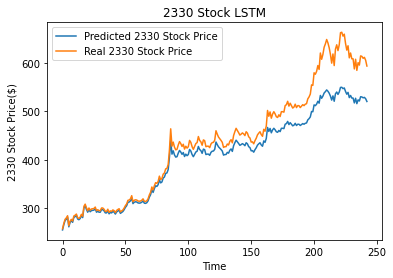

In [18]:
plt.plot(stock_prediction, label = 'Predicted 2330 Stock Price', linewidth = 1.5)
plt.plot(dataset_test, label = 'Real 2330 Stock Price', linewidth = 1.5)
plt.title("2330 Stock LSTM")
plt.xlabel('Time')
plt.ylabel('2330 Stock Price($)')
plt.legend()
plt.show()